# Statistical Data Analysis project

by

# Lauri Reima 2109673

In [97]:
import pandas as pd
import scipy
from scipy import stats
import numpy as np

In [98]:
data = pd.read_csv('bikes.data')

# Data preparation
First we have to take alook at the varibles and that there are no invalid values variable at a time.

In [99]:
print(
    data.ticket.value_counts(),'\n\n',
    data.month.value_counts(),'\n\n',
    data.location_from.value_counts(),'\n\n',
    data.location_to.value_counts(),'\n\n',
    data.assistance.value_counts(),'\n\nmin duration:',
    data.duration.min(),'\n\nmin distance: ',
    data.distance.min(),'\n\nmin cost:',
    data.cost.min(),'\n\nmax cost:',
    data.cost.max(),'\n\nlowest energy used:',
    data.energy_used.min(),'\n\nlowest energy collected:',
    data.energy_collected.min(),'\n\nhighest energy used:',
    data.energy_used.max(),'\n\nhighest energy collected:',
    data.energy_collected.max()
)

ticket
single     967
season     553
savonia    254
Name: count, dtype: int64 

 month
6     355
7     355
5     298
9     277
10    237
8     214
4      38
Name: count, dtype: int64 

 location_from
TORI              418
KAUPPAKATU        237
SATAMA            200
MICROTEKNIA       182
PUIJONLAAKSO      161
NEULAMÄKI         157
KEILANKANTA       153
TASAVALLANKATU    144
KYS                94
PIRTTI             28
Name: count, dtype: int64 

 location_to
TORI              400
KAUPPAKATU        287
PUIJONLAAKSO      190
MICROTEKNIA       176
SATAMA            163
TASAVALLANKATU    156
NEULAMÄKI         155
KEILANKANTA       142
KYS                75
PIRTTI             30
Name: count, dtype: int64 

 assistance
1    1625
0     149
Name: count, dtype: int64 

min duration: 2.0 

min distance:  -3380 

min cost: 0.0 

max cost: 100.0 

lowest energy used: 0.0 

lowest energy collected: 0.0 

highest energy used: 144.9 

highest energy collected: 56.4


So we can see that the 'ticket', 'assistance', 'location_from' and 'location_to' are all OK.
We can see that the 'monts':s are named with a number. We could name them.
Minimum cost is 0.0 and maximum cost is 100.0 which are both plausable, but we should check if the 100 euros is a mistake

In [100]:
data[data.cost == 100]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
100,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,0,0.0,3.6
609,savonia,100.0,9,NEULAMÄKI,MICROTEKNIA,25614.0,2310,0,0.0,3.6
1231,single,100.0,6,TASAVALLANKATU,PIRTTI,22793.0,14690,1,91.3,6.3


I think it is OK. \
Minimum distance is negative so we have to take a look at that data.

In [101]:
data[data.distance < 0]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
23,single,0.15,5,TASAVALLANKATU,TASAVALLANKATU,138.0,-150,1,0.2,0.0
60,season,0.00,8,MICROTEKNIA,MICROTEKNIA,41.0,-20,1,0.0,0.0
62,single,0.10,8,KEILANKANTA,KEILANKANTA,73.0,-30,1,0.0,0.0
96,single,0.05,5,TORI,TORI,48.0,-10,1,0.0,0.0
125,savonia,0.00,10,KAUPPAKATU,KAUPPAKATU,48.0,-20,1,0.0,0.0
242,savonia,0.00,10,TORI,KAUPPAKATU,207.0,-180,1,3.3,0.0
284,single,0.15,4,KAUPPAKATU,KAUPPAKATU,178.0,-50,1,0.2,0.0
295,season,0.00,8,KAUPPAKATU,KAUPPAKATU,79.0,-60,1,0.0,0.0
318,single,0.45,8,KYS,PUIJONLAAKSO,480.0,-880,1,0.0,0.0
322,savonia,0.00,10,KYS,KYS,70.0,-10,1,0.0,0.0


Luckily there are only so few off the negative distance values. In my oppinion it looks like the values could be just changed to positive
and they would look allright. So I just use the abs() to get the absolute value. \
After that we should take in count only those rides that lasted for a minute or longer, because then we know the ocasion wasn't just a test. We might also filter out all of the rides that were shorter than 20 metres because they are not relevant.

In [102]:
data['distance'] = data['distance'].abs() 

filtered_data = data[(data['duration'] > 59) & (data['distance'] >= 20)]
renamed_months = {4 : 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october'}
filtered_data.loc[:, 'month'] = filtered_data['month'].replace(renamed_months)


Our data is almoust ready, the min and max values of energy used and collected are fine, but we should take a look if there are trips that have assistance ON, but still didn't use any energy or trips that have assistance OFF and still use energy:

In [103]:
assistance = filtered_data[((filtered_data.assistance==1) & (filtered_data.energy_used==0)) | ((filtered_data.assistance == 0) & (filtered_data.energy_used > 0))]
assistance

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
62,single,0.10,august,KEILANKANTA,KEILANKANTA,73.0,30,1,0.0,0.0
231,single,0.10,july,TASAVALLANKATU,TASAVALLANKATU,61.0,1300,0,9.0,11.1
254,single,0.10,july,PUIJONLAAKSO,PUIJONLAAKSO,66.0,30,1,0.0,0.0
295,season,0.00,august,KAUPPAKATU,KAUPPAKATU,79.0,60,1,0.0,0.0
318,single,0.45,august,KYS,PUIJONLAAKSO,480.0,880,1,0.0,0.0
321,savonia,0.00,september,TORI,TORI,112.0,130,1,0.0,0.0
462,single,0.50,august,PUIJONLAAKSO,TORI,570.0,1770,1,0.0,0.0
474,single,0.30,august,KAUPPAKATU,TORI,313.0,270,1,0.0,0.0
611,season,0.00,october,PIRTTI,PIRTTI,1795.0,1880,0,12.1,2.7
639,single,0.15,august,KYS,KYS,133.0,110,1,0.0,0.0


There are some and that shouldn't be possible. In my oppinion it is very much impossible to ride a electric bike without
using any assisting energy. And ofcourse if your assistance is not ON you should not be able to use energy Therefore we might assume the data might corrupt the analysis and we should filter it out.

In [104]:
filt = filtered_data.isin(assistance.to_dict(orient='list')).all(axis=1)
res = filtered_data[~filt]

In [105]:
filtered_data = res

The last thing we should look into if there are any trips with "impossible" velocitys. If there are any we should filer them out because the bike may have been broken and giving false data. The following code inspect if there are speed higher than 11 m/s which is about 40 km/h That is a plausible speed but should be fairly rare.

In [106]:
filtered_data[filtered_data.distance / filtered_data.duration > 11]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected


There are non

# Data exploration
We need to group the data by the ticket type.

In [107]:
grouped = filtered_data.groupby('ticket')

This next step isn't vital, but I wanted to make a individual dataframe of each of the ticket types and put them into an array 
so we can loop through them.

In [108]:
group_dataframes = {}
for name, group in grouped:
    group_dataframes[name] = group

In [109]:
singles = group_dataframes['single']
season = group_dataframes['season']
savonia = group_dataframes['savonia']
data_array = [singles, season, savonia]

In [110]:
for i in range(3):
    print('Ticket type', data_array[i].ticket.iloc[0], 'has total of' ,data_array[i].shape[0], 'trips.')
    print(' Total distance was: ', data_array[i]['distance'].sum() / 1000, 'km')
    print(' Total time spent on a bike was: ', round(data_array[i]['duration'].sum() / 3600, 1), 'hours')
    print(' Total amount spent was: ',round(data_array[i].cost.sum(), 1), '\n\n')

Ticket type single has total of 792 trips.
 Total distance was:  2558.1 km
 Total time spent on a bike was:  181.2 hours
 Total amount spent was:  644.9 


Ticket type season has total of 444 trips.
 Total distance was:  1309.45 km
 Total time spent on a bike was:  86.8 hours
 Total amount spent was:  3.0 


Ticket type savonia has total of 218 trips.
 Total distance was:  499.47 km
 Total time spent on a bike was:  52.6 hours
 Total amount spent was:  202.0 




So from this data we can see that 'Single' ticket owners had the most trips, they travalled the furthest, longest time and they
also paid the most. \
'Season' ticket holders paid the least amount of money and 'Savonia' ticket holders spent the least time on the bikes.

In [129]:
monthly = filtered_data[['ticket','distance','month']].groupby(['month','ticket'])['distance'].sum().unstack()
monthly = monthly/1000
order = ['april', 'may','june','july','august','september','october']

Text(0, 0.5, 'Total distance in km')

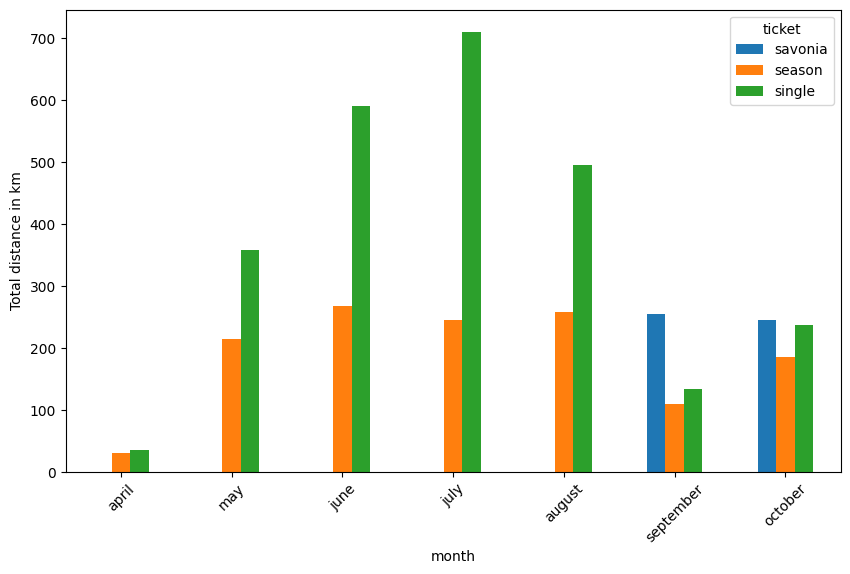

In [131]:
pic = monthly.plot(kind="bar", figsize=(10, 6))
pic.set_xticklabels(order, rotation=45)
pic.set_ylabel("Total distance in km")

From the chart we can see that 'season' and 'single' users use bikes on all of the months, unlike 'savonia' users who 
use the bikes only on september and october. In septermber when 'savonia' users emerge, there is a huge dip in 'season' and
'single' users, which is odd. Maybe the 'savonia' students horde the bikes so that regular users can't find them so easily, or maybe some
of the 'single' and 'season' ticket holders change their status.

To find the stations with highest deficit and surplus I just count how many times each street appears in the column 'location_from' and 'location_to'. After that i collect the data with two for loops that collect two kind of data. \
def_array and surplus_array contain the name of the street \
d_amo and s_amo contain the name and their deficit or surplus (this data is just for printing reasons).

In [113]:
lfrom = filtered_data['location_from'].value_counts()
lto = filtered_data['location_to'].value_counts()
amount_of_bikes = lto - lfrom

In [114]:
def_array = []
d_amo = []
surplus_array = []
s_amo = []
s = amount_of_bikes
for i in range(3):
    name = s[s == s.min()].index[0]
    name_amount = name+': '+ str(s.min())
    def_array.append(name)
    d_amo.append(name_amount)
    s.drop(s[s == s.min()].index[0], inplace=True)
for i in range(3):
    name = s[s == s.max()].index[0]
    name_amount = name+': '+ str(s.max())
    surplus_array.append(name)
    s_amo.append(name_amount)
    s.drop(s[s == s.max()].index[0], inplace=True)

In [115]:
print('More bikes should be relocated to these streets: ')
for i in d_amo:
    print(i)
print('because they have the biggest deficit')

More bikes should be relocated to these streets: 
SATAMA: -39
KYS: -18
TORI: -14
because they have the biggest deficit


In [116]:
print('Bikes from mean:',lfrom.mean(),'\nBikes from high deficit streets:\n')
lfrom[def_array]

Bikes from mean: 145.4 
Bikes from high deficit streets:



location_from
SATAMA    166
KYS        79
TORI      328
Name: count, dtype: int64

In [117]:
print('More bikes should be taken from these streets: ')
for i in s_amo:
    print(i)
print('because they have the biggest surplus')

More bikes should be taken from these streets: 
KAUPPAKATU: 45
PUIJONLAAKSO: 28
TASAVALLANKATU: 13
because they have the biggest surplus


In [118]:
print('Bikes to mean:',lto.mean(),'\nBikes to high surplus streets:\n')
lto[surplus_array]

Bikes to mean: 145.4 
Bikes to high surplus streets:



location_to
KAUPPAKATU        237
PUIJONLAAKSO      161
TASAVALLANKATU    122
Name: count, dtype: int64

From the data above we can see that for example 'KAUPPAKATU' has a huge surplus and there is a lot of traffic going that way. \
And on the other end there is 'SATAMA'. The mean value of bikes leaving a place is 145 and in 'SATAMA' the value is 166. That isn't that much higher
than the avarage but still the deficit is notable. It seems that the amount of people that goes to the harbour with a bike 
is quite alot smaller than the amount of people leaving. It might tell a story about finnish alcohol culture :) 

To calculate the energy gained, I took the 'energy_collected' and deleted the value of 'energy_used' from it. \ Then I made a new collumn of it to a new data frame.

In [119]:
new_data = filtered_data.copy()
new_data['energy_gain'] = (filtered_data.energy_collected - filtered_data.energy_used) 

<Axes: ylabel='Density'>

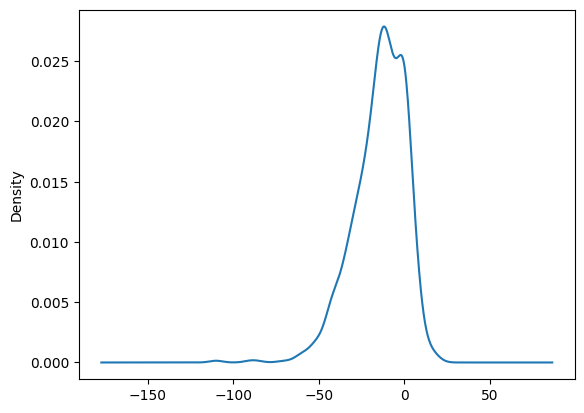

In [120]:
new_data.energy_gain.plot(kind='density')

In [121]:
print('Normality with shapiros test:')
print(scipy.stats.shapiro(new_data.energy_gain)[1])

Normality with shapiros test:
1.4177982479371025e-22


In [122]:
new_data.energy_gain.mean()

-14.326409903713891

The battery consumption is higher than the energy collecting. On avarage the consumption is 14.3 so the batteries are used
more than loaded.

In [123]:
print('Normalitys of durations are: \n  Season ticket holders:',scipy.stats.shapiro(season.duration)[1],
      '\n  Single ticket holders:', scipy.stats.shapiro(singles.duration)[1])

Normalitys of durations are: 
  Season ticket holders: 9.690110935878238e-10 
  Single ticket holders: 2.802596928649634e-45


Single ticket data is not normal and its there is very little evidence that season ticket data would be normal so we can declare it to be 
not normal. There are two different groups so they are literally unpaired. Data sets don't have a connection to each other 
for example they don't have the same users. The tickets may be used one a same street, but that doesn't matter because the main groups, the
ticket, are different. So we will use the Mann-Whitney U test.

In [124]:
p_val_season_singles = scipy.stats.mannwhitneyu(season.duration,singles.duration,use_continuity=True,alternative='two-sided')[1]
print('The P-value is:', p_val_season_singles)

The P-value is: 0.3346268944917491


The P-value is well above the threshold 0.05 so we can say that there are similaritys in the groups durations.
We can't reject the Null Hypothesis, so we can say that there is no statistical evidence to claim that the travel times 
are longer or shorter for the single than for the season ticket type.

To calculate the correlation between distance and electricity consumption I first have to explain my vision on consumption. Simply put
its the 'energy_used' - 'energy_collected'. For example if one uses a bike which has a charge of 45. They use 17 and collect 3, so after 
the trip there is 31 left so the consumption was 14, not 17.

In [125]:
distance = filtered_data.distance
consumption = (filtered_data.energy_used - filtered_data.energy_collected)
print('P-values are :\n Distance:', scipy.stats.shapiro(distance)[1], '\n Consumption:', scipy.stats.shapiro(consumption)[1])

P-values are :
 Distance: 3.751254102733392e-33 
 Consumption: 1.415625157024272e-22


Consumption is an interval varible as it can be positive or negative(if u actually just collect electricity), and distance is a ratio type 
variable. There is no proof that they are normally distributed so one could say they are not normal. Therefore we should use Spearman rank 
correlation coefficient to calculate the correlation.

In [126]:
print('r =', scipy.stats.spearmanr(consumption, distance)[0], '\np =',scipy.stats.spearmanr(consumption, distance)[1])

r = 0.665000521495763 
p = 2.6702909384633443e-186


The P-value is very small so we can say that the variables are correlated. The correlation coefficient is 0.68 which indicates 
a strong positive monotonic relationship between trip duration and electricity consumption.

<Axes: xlabel='distance', ylabel='consumption'>

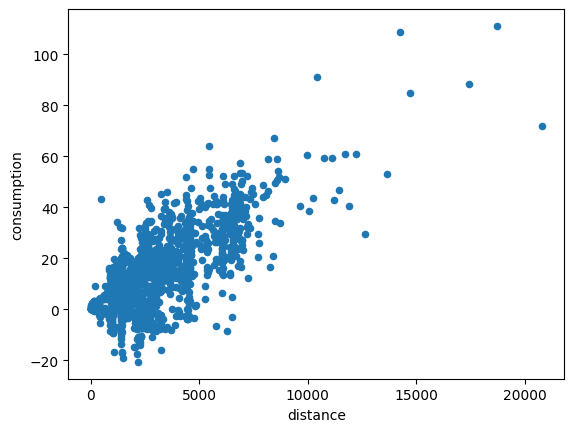

In [127]:
d = filtered_data.copy()
d['consumption'] = consumption
d.plot.scatter('distance', 'consumption')

The graph above verifys the correlation. So it can be said the longer the distance is the higher the consumption.

To study if there is evidence to claim the savonia ticket type differs from others(season and single) in the frequency of 
electric assistance use, we have to rename the season and single ticket types. That way we have two different groups. 
We notice that the assistance variable is actually a categorical variable, it has numerical values but they simple mean ON (1) or OFF (0).
Therefore wew can use the Pearson's chi-squared test.

In [128]:
grouped_data = filtered_data.copy()
grouped_data['ticket'] = filtered_data['ticket'].replace({'single': 'other', 'season': 'other'})
contingency_table = pd.crosstab(grouped_data['ticket'],grouped_data['assistance'], margins=True)
print('P-value:',scipy.stats.chi2_contingency(contingency_table).pvalue)

P-value: 0.0001711255411363056


P-value is a lot smaller than the threshold (0.05) so we can declare that there is a significant difference in the 
usage of electric assistance between Savonia students and others.

# A
Hypothesis is that there are longer trips on other parts of town than the other (for example east vs. west). 
Firts you should know where the locations are located and make four groups of them. East to east, west to west, east to west and west to east. Then you can count the normality of the variables and the correlations. You can also print a scat